In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [10]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<Axes: xlabel='Gene One', ylabel='Gene Two'>

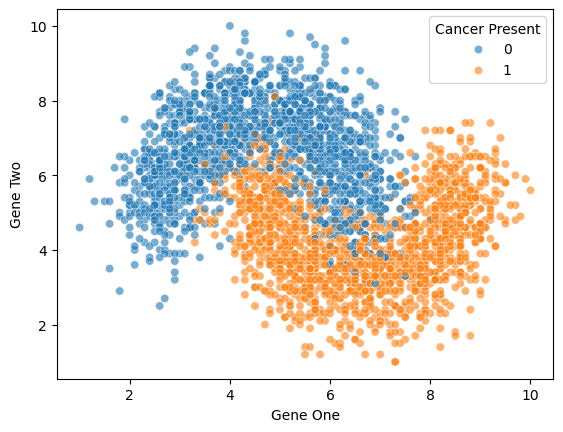

In [22]:
sns.scatterplot(data=df, x='Gene One',y='Gene Two', hue='Cancer Present',alpha=0.6)

(4.0, 8.0)

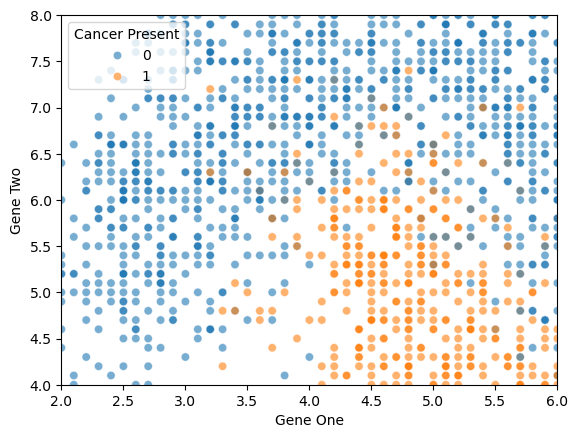

In [26]:
# If you want to see graph more closely using xlim and ylim of matplotlib
# We are actually zooming for better view of the graph
sns.scatterplot(data=df, x='Gene One',y='Gene Two', hue='Cancer Present',alpha=0.6)
plt.xlim(2,6)
plt.ylim(4,8)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

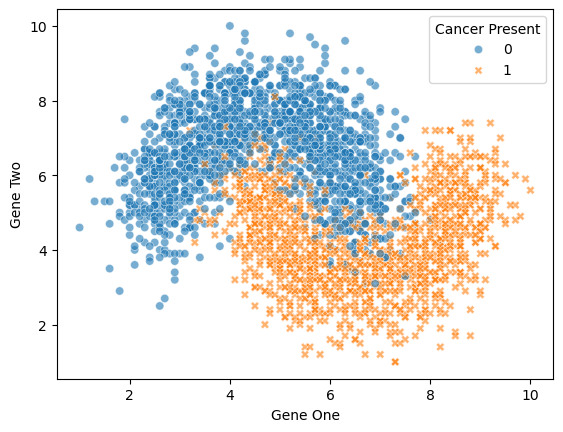

In [28]:
# Also we can change the style for target value ie. 'Cancer Present'
sns.scatterplot(data=df, x='Gene One',y='Gene Two', hue='Cancer Present',alpha=0.6, style='Cancer Present')

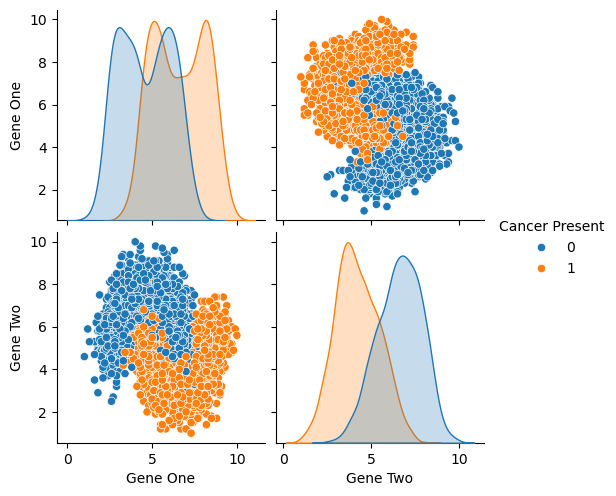

In [30]:
sns.pairplot(data=df,hue='Cancer Present')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# help(KNeighborsClassifier)

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
y_pred = knn_model.predict(scaled_X_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [85]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

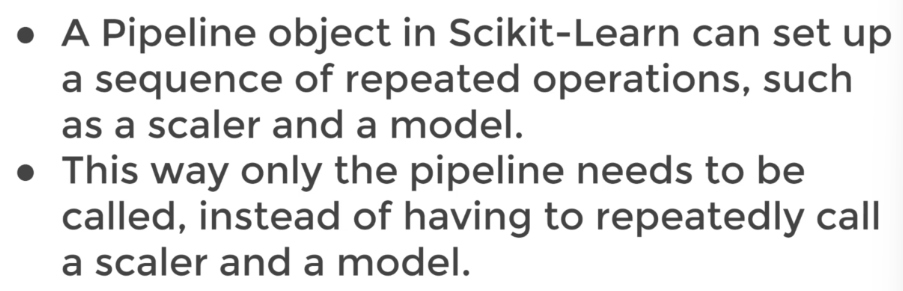

In [89]:
from sklearn.metrics import accuracy_score

In [93]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)

    test_error_rates.append(test_error)

In [95]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0.5, 0, 'K Neighbors')

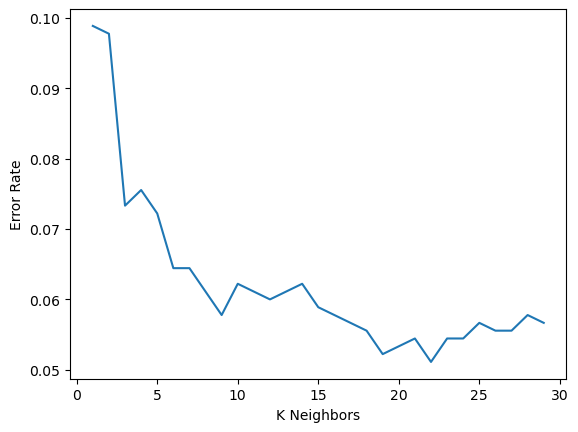

In [97]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

## How decide value of K-Neighbors

### PIPELINE --> GRIDSEARCH CV

In [104]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [110]:
# get the parameter list for knn object
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [112]:
# String code should match with variable name as below
operations = [('scaler',scaler),('knn',knn)]

In [114]:
# Setup PIPELINE
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [128]:
from sklearn.model_selection import GridSearchCV

In [118]:
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [124]:
# knn refers to the instance of KNeighbors Classifiers
# Then double underscore
# Then n_neighbors is one of the parameter in knn ojbect 
# Then : the variable stores the value for the above parameter ie. n_neighbors
param_grid = {'knn__n_neighbors':k_values}

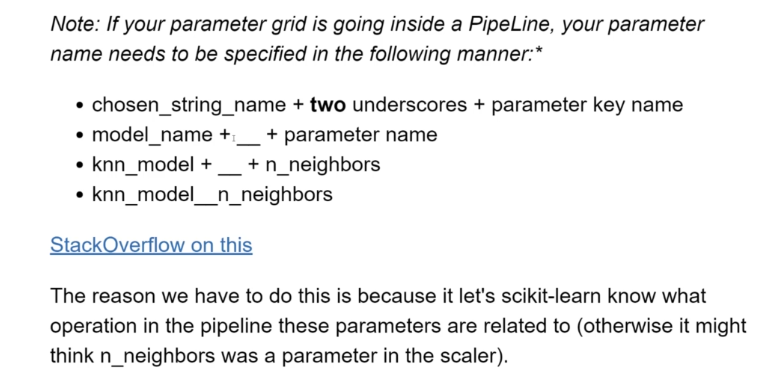

In [132]:
full_cv_classifier = GridSearchCV(pipe, param_grid,cv=5,scoring='accuracy')

# we are not scaling the data here, because
# This process will be taken care by pipe operation
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [136]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [140]:
full_pred = full_cv_classifier.predict(X_test)

In [142]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [65]:
len(df)

3000